In [1]:
import pandas as pd
import numpy as np
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexCustomFeatures,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexTSFeatures,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexPriceBasedLabelGenerator,
    ForexIndicatorBasedLabelGenerator,
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ForexDataLoad(file_path = '../data/xauaud.csv').data
df_without_atr_vol_returns = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



In [3]:
cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 76

In [4]:
add_volatility = ForexVolatilityIndicators(data = data)

VOLATILITY INDICATORS
 Available Fuctions 
1 add_atr 
2 add_bollinger_bands 
3 add_keltner_channels 
4 add_standard_deviation  
5 get_all_volatility_indicators


In [5]:
data = add_volatility.get_all_volatility_indicators()

In [6]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,vol_bb__lower_20,vol_bb__upper_50,vol_bb__middle_50,vol_bb__lower_50,vol_keltner_middle,vol_keltner_upper,vol_keltner_lower,vol_std_dev_20,vol_std_dev_50,vol_std_dev_100
datetime,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,5422.514106,5462.741921,5434.0978,5405.453679,5436.484861,5463.965423,5409.004298,9.324447,14.322061,57.792779
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,5420.895144,5462.661627,5434.2568,5405.851973,5435.621540,5462.796047,5408.447034,9.794178,14.202413,56.634311
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,5419.786090,5462.657336,5434.2324,5405.807464,5434.874727,5460.679783,5409.069671,10.141455,14.212468,55.188630
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,5419.004726,5462.549406,5434.5154,5406.481394,5434.572372,5459.666922,5409.477822,10.122387,14.017003,54.256884
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,5419.632703,5463.087890,5434.9696,5406.851310,5435.794051,5467.211146,5404.376956,9.602899,14.059145,53.994257
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,5419.778487,5463.633915,5435.8618,5408.089685,5437.624141,5470.507527,5404.740756,9.501006,13.886057,53.575516
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,5415.807966,5466.419475,5436.9340,5407.448525,5441.149461,5475.358508,5406.940414,12.304267,14.742737,53.428630
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,5414.167074,5468.401278,5437.7528,5407.104322,5443.753322,5478.231465,5409.275180,13.734463,15.324239,53.194591
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,5411.741962,5471.135344,5438.7294,5406.323456,5446.904434,5481.376762,5412.432106,15.728269,16.202972,53.074741


In [7]:
add_trend = ForexTrendIndicators(data = data)

TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 add_trend_confirmation


In [8]:
data = add_trend.get_all_trend_indicators()

In [9]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,trend_ema_26,trend_ema_50,trend_ema_50_slope,trend_macd_line,trend_macd_signal,trend_macd_histogram,trend_adx,trend_plus_di,trend_minus_di,trend_parabolic_sar
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,5435.632859,5424.486189,-0.269640,0.005562,3.273904,-3.268342,13.616536,15.071611,27.548188,5453.848998
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,5435.024499,5424.601241,0.115051,-0.650450,2.489033,-3.139483,14.228368,16.453183,25.833236,5450.763478
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,5434.487869,5424.725898,0.124657,-1.128290,1.765569,-2.893858,14.796498,15.866024,24.911333,5447.924800
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,5434.281360,5424.999392,0.273494,-1.177101,1.177035,-2.354136,14.915738,16.963071,23.650431,5445.313216
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,5435.253112,5425.877847,0.878455,0.050493,0.951726,-0.901234,15.462944,29.777290,18.808303,5415.280000
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,5436.716585,5427.020285,1.142437,1.618773,1.085136,0.533637,15.971064,26.705218,16.867883,5416.314800
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,5439.525727,5428.887725,1.867440,4.394961,1.747101,2.647860,17.384413,32.077099,15.179211,5417.328904
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,5441.671228,5430.440755,1.553030,6.029353,2.603551,3.425802,18.829879,30.830188,13.974317,5419.627748
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,5444.276323,5432.260333,1.819578,7.907246,3.664290,4.242956,20.430768,31.110880,12.942315,5423.119283


In [10]:
add_momentum = ForexMomentumIndicators(data = data)

MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 get_all_momentum_indicators


In [11]:
data = add_momentum.get_all_momentum_indicators()

In [12]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,momen_rsi_21_trend,momen_rsi_28,momen_rsi_28_trend,momen_stoch_slowk,momen_stoch_slowd,momen_williams_r,momen_cci,momen_momentum_10,momen_momentum_14,momen_momentum_20
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,-1.312349,49.109839,-1.043940,13.131102,27.527613,-93.281654,-260.107454,-13.96,-24.04,-22.38
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,3.599209,51.625410,2.515571,14.891953,17.453334,-68.630491,-157.023124,-18.89,-16.68,-13.59
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0.132832,51.718806,0.093396,23.462532,17.161863,-67.700258,-123.113399,-14.17,-17.81,-8.29
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,1.470799,52.748957,1.030151,35.366064,24.573516,-57.571059,-86.038427,-8.21,-6.79,-16.39
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,5.352749,56.595460,3.846503,45.602770,34.810455,-37.920371,58.033198,9.67,15.56,-8.22
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,2.300725,58.301746,1.706286,60.432118,47.133651,-23.212215,85.212017,7.28,8.70,-1.16
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,5.170344,62.269453,3.967707,79.532866,61.855918,-0.268817,220.359631,23.77,32.69,32.72
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,-2.499583,60.402115,-1.867338,87.200172,75.721719,-14.918452,197.729686,25.95,28.58,24.39
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,2.064130,62.006338,1.604223,91.560448,86.097828,-10.131387,205.763393,39.24,39.11,31.25


In [13]:
add_volume = ForexVolumeIndicators(data = data)

VOLUME INDICATORS
 Available Fuctions 
1 add_obv 
2 add_volume_sma 
3 add_volume_roc 
4 get_all_volume_indicators


In [14]:
data = add_volume.get_all_volume_indicators()

In [15]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,volu_volume_sma_10,volu_volume_sma_10_ratio,volu_volume_sma_20,volu_volume_sma_20_ratio,volu_volume_sma_50,volu_volume_sma_50_ratio,volu_volume_roc_5,volu_volume_roc_10,volu_volume_roc_14,volu_volume_roc_21
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [16]:
customs = ForexCustomFeatures(data =data)

CUSTOM FEATURES
 Available Functions: 
1 add_returns_features 
2 add_volatility_measures 
3 add_price_position_features 
4 add_seasonality_features 
5 add_time_based_features 
6 add_custom_derived_features 
7 get_all_custom_features


In [17]:
data = customs.get_all_custom_features()

In [18]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,is_month_end,is_quarter_end,is_year_end,season,minutes_since_monday_open,period_of_day,days_to_month_end,days_to_quarter_end,range_expansion,range_contraction
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,0,0,0,summer,6420,morning,25,25,0,0
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,0,0,0,summer,6480,morning,25,25,0,0
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0,0,0,summer,6540,afternoon,25,25,0,0
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,0,0,0,summer,6600,afternoon,25,25,0,0
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,0,0,0,summer,6660,afternoon,25,25,1,0
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,0,0,0,summer,6720,afternoon,25,25,1,0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,0,0,0,summer,6780,evening,25,25,1,0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,0,0,0,summer,6840,evening,25,25,0,0
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,0,0,0,summer,6900,evening,25,25,0,0


In [19]:
fill_missing_values = ForexDataClean(data = data)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers


In [20]:
#we must do this,cause my data have error volume col and i need the columns for tests 
data = fill_missing_values.handle_missing_values(method = 'zero')

Found 346011 missing values
 filled with zeros: 346011 missing values .


In [21]:
n_data = data[data.index >= '2020']

In [22]:
n_data.head()

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,is_month_end,is_quarter_end,is_year_end,season,minutes_since_monday_open,period_of_day,days_to_month_end,days_to_quarter_end,range_expansion,range_contraction
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-02 01:00:00,2165.82,2169.32,2162.89,2163.11,0,4.223937,3.948706,3.802334,2177.965036,2169.623,...,0,0,0,winter,4380,late_night,29,29,1,0
2020-01-02 02:00:00,2163.13,2166.00,2162.70,2164.96,0,4.157941,3.917815,3.784393,2177.921552,2169.654,...,0,0,0,winter,4440,late_night,29,29,0,0
2020-01-02 03:00:00,2164.94,2167.28,2162.74,2165.66,0,4.185231,3.947443,3.811379,2177.771560,2169.368,...,0,0,0,winter,4500,late_night,29,29,0,0
2020-01-02 04:00:00,2165.66,2167.58,2163.86,2167.39,0,4.152000,3.936613,3.808115,2177.532311,2169.155,...,0,0,0,winter,4560,late_night,29,29,0,0
2020-01-02 05:00:00,2167.39,2169.93,2166.75,2169.91,0,4.082572,3.900583,3.785683,2177.181157,2168.994,...,0,0,0,winter,4620,early_morning,29,29,0,0


FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33547 entries, 2020-01-02 01:00:00 to 2025-09-05 20:00:00
Columns: 130 entries, open to range_contraction
dtypes: UInt32(1), category(3), float64(100), int32(9), int64(17)
memory usage: 31.6 MB
None

2. FIRST 3 ROWS:
                        open     high      low    close  volume  vol_atr_14  \
datetime                                                                      
2020-01-02 01:00:00  2165.82  2169.32  2162.89  2163.11       0    4.223937   
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96       0    4.157941   
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66       0    4.185231   

                     vol_atr_21  vol_atr_28  vol_bb__upper_20  \
datetime                                                        
2020-01-02 01:00:00  

<Figure size 1500x600 with 0 Axes>

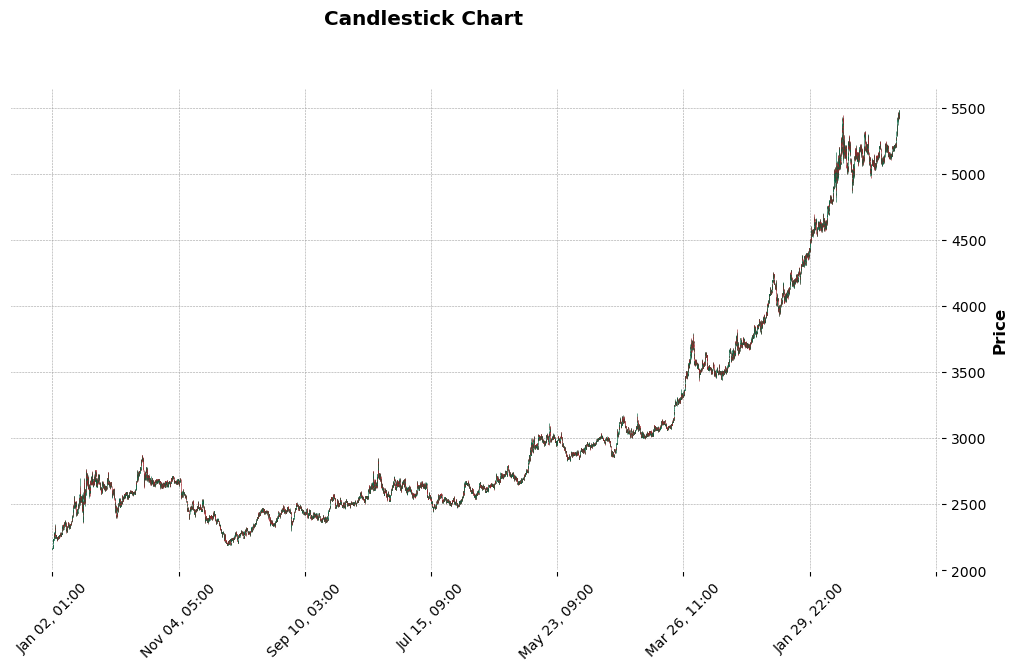

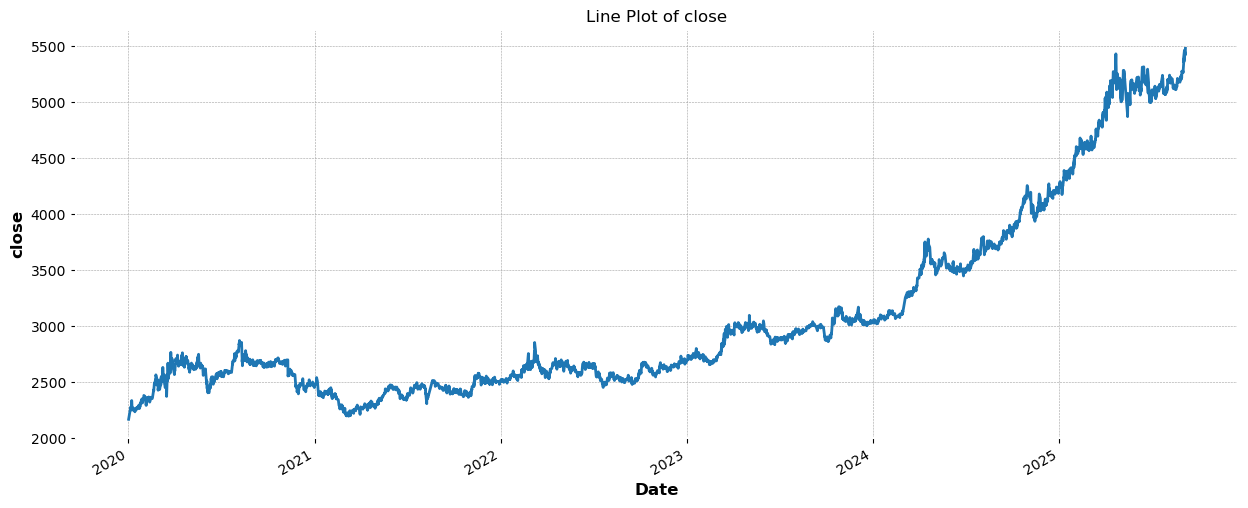

DATASET SUMMARY
Total Rows: 33547
Total Columns: 130
Date Range: 2020-01-02 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume', 'vol_atr_14', 'vol_atr_21', 'vol_atr_28', 'vol_bb__upper_20', 'vol_bb__middle_20', 'vol_bb__lower_20', 'vol_bb__upper_50', 'vol_bb__middle_50', 'vol_bb__lower_50', 'vol_keltner_middle', 'vol_keltner_upper', 'vol_keltner_lower', 'vol_std_dev_20', 'vol_std_dev_50', 'vol_std_dev_100', 'trend_sma_20', 'trend_sma_20_slope', 'trend_sma_50', 'trend_sma_50_slope', 'trend_sma_100', 'trend_sma_100_slope', 'trend_ema_12', 'trend_ema_26', 'trend_ema_50', 'trend_ema_50_slope', 'trend_macd_line', 'trend_macd_signal', 'trend_macd_histogram', 'trend_adx', 'trend_plus_di', 'trend_minus_di', 'trend_parabolic_sar', 'momen_rsi_14', 'momen_rsi_14_trend', 'momen_rsi_21', 'momen_rsi_21_trend', 'momen_rsi_28', 'momen_rsi_28_trend', 'momen_stoch_slowk', 'momen_stoch_slowd', 'momen_williams_r', 'momen_cci', 'momen_momentum_10', 'momen_momentum_14

In [23]:
quick_look = ForexQuickLook(data = n_data, full_look = True)

In [24]:
price_based_labels = ForexPriceBasedLabelGenerator(data = n_data)

LABEL GENERATION
 Available Functions: 
1 generate_directional_labels 
2 generate_return_threshold_labels 
3 generate_time_horizon_labels 
4 generate_all_labels 
5 get_label_columns


In [25]:
n_data = price_based_labels.generate_all_labels()

Generating directional labels...
Generating return threshold labels...
Generating time horizon labels...
Generated 12 labels directly in dataframe


In [26]:
n_data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb__upper_20,vol_bb__middle_20,...,label_dir_24h,label_dir_120h,label_ret_0.5pct_1h,label_ret_1pct_1h,label_ret_2pct_1h,label_ret_2pct_vol_adj_1h,label_scalping,label_intraday,label_swing,label_scalping_conf
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,-1,-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,-1,-1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,-1,-1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,-1,-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,-1,-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,-1,-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,-1,-1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,-1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
labels = pd.concat([n_data.filter(like='label'), n_data['close']], axis=1)

In [28]:
labels.head()

,label_dir_1h,label_dir_4h,label_dir_24h,label_dir_120h,label_ret_0.5pct_1h,label_ret_1pct_1h,label_ret_2pct_1h,label_ret_2pct_vol_adj_1h,label_scalping,label_intraday,label_swing,label_scalping_conf,close
datetime,,,,,,,,,,,,,
2020-01-02 01:00:00,1,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2163.11
2020-01-02 02:00:00,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2164.96
2020-01-02 03:00:00,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2165.66
2020-01-02 04:00:00,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2167.39
2020-01-02 05:00:00,-1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2169.91


In [29]:
print(labels.shape, n_data.shape)

(33547, 13) (33547, 145)


In [30]:
labels.info(
    
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33547 entries, 2020-01-02 01:00:00 to 2025-09-05 20:00:00
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   label_dir_1h               33547 non-null  int64  
 1   label_dir_4h               33547 non-null  int64  
 2   label_dir_24h              33547 non-null  int64  
 3   label_dir_120h             33547 non-null  int64  
 4   label_ret_0.5pct_1h        33547 non-null  float64
 5   label_ret_1pct_1h          33547 non-null  float64
 6   label_ret_2pct_1h          33547 non-null  float64
 7   label_ret_2pct_vol_adj_1h  33547 non-null  float64
 8   label_scalping             33547 non-null  float64
 9   label_intraday             33547 non-null  float64
 10  label_swing                33547 non-null  float64
 11  label_scalping_conf        33547 non-null  float64
 12  close                      33547 non-null  float64
dtypes: float64(

In [31]:
labels.nunique()

label_dir_1h                     2
label_dir_4h                     2
label_dir_24h                    2
label_dir_120h                   2
label_ret_0.5pct_1h              3
label_ret_1pct_1h                3
label_ret_2pct_1h                3
label_ret_2pct_vol_adj_1h        1
label_scalping                   3
label_intraday                   3
label_swing                      3
label_scalping_conf              1
close                        29022
dtype: int64

In [32]:
indi_labels = ForexIndicatorBasedLabelGenerator(data = n_data)

TECHNICAL INDICATOR LABELS
Available Methods: 
1 add_rsi_labels 
2 add_macd_labels 
3 add_bollinger_bands_labels 
4 add_stochastic_labels 
5 get_all_technical_labels 
6 get_label_summary


IndexError: list index out of range